<a href="https://colab.research.google.com/github/enznoor/ZnRepository/blob/main/FP_Libra_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score , roc_curve, roc_auc_score, auc

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM

In [ ]:
# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU.")

GPU is available. Using GPU.


In [ ]:
#Load Data to memory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BasePath='drive/MyDrive/Term_05/FinalProject/Dataset/'
DF_LibraEgonet=pd.read_csv(BasePath+ 'Libra_ego_features.csv')
DF_Librarwalk = pd.read_csv(BasePath+'Libra_rwalk_features_L1_R2.csv')

In [ ]:
#df_node_features_ego=DF_LibraEgonet.sample(frac=0.1)


In [ ]:
df_node_features_ego=DF_LibraEgonet
N = len(df_node_features_ego)      # number of nodes
print('number of nodes:' , N)
total_alerts = np.sum(df_node_features_ego["nr_alerts"])  # number of (weighted) alerts
print('number of (weighted) alerts',total_alerts)
tpr_a_average = np.zeros(N)
total_reports = np.sum(df_node_features_ego["nr_reports"])  # number of (weighted) reports
print('number of (weighted) reports',total_reports)
tpr_r_average = np.zeros(N)

number of nodes: 385100
number of (weighted) alerts 711.0
number of (weighted) reports 17.0


In [ ]:
FeatureList=['f_degree_in','f_degree_out' , 'f_amount_in','f_amount_out','f_nr_trans_in','f_nr_trans_out','f_ego_nr_nodes',
             'f_ego_nr_edges','f_egored_degree_in','f_egored_degree_out','f_egored_amount_in','f_egored_amount_out','f_egored_nr_trans_in',
             'f_egored_nr_trans_out','f_egored_nr_nodes','f_egored_nr_edges']

In [ ]:
FeatureList=['f_degree_in','f_degree_out' ,
             'f_egored_amount_in','f_egored_amount_out']


In [ ]:
df_node_features_ego['NodeId'] = df_node_features_ego['NodeId'].astype(int)
df_node_features_ego['f_degree_in'] = df_node_features_ego['f_degree_in'].astype(int)
df_node_features_ego['f_degree_out'] = df_node_features_ego['f_degree_out'].astype(int)
df_node_features_ego['f_amount_in'] = df_node_features_ego['f_amount_in'].astype(int)
df_node_features_ego['f_amount_out'] = df_node_features_ego['f_amount_out'].astype(int)

df_node_features_ego['f_nr_trans_in'] = df_node_features_ego['f_nr_trans_in'].astype(int)
df_node_features_ego['f_nr_trans_out'] = df_node_features_ego['f_nr_trans_out'].astype(int)
df_node_features_ego['f_ego_nr_nodes'] = df_node_features_ego['f_ego_nr_nodes'].astype(int)
df_node_features_ego['f_ego_nr_edges'] = df_node_features_ego['f_ego_nr_edges'].astype(int)
df_node_features_ego['f_egored_degree_in'] = df_node_features_ego['f_egored_degree_in'].astype(int)
df_node_features_ego['f_egored_degree_out'] = df_node_features_ego['f_egored_degree_out'].astype(int)
df_node_features_ego['f_egored_amount_in'] = df_node_features_ego['f_egored_amount_in'].astype(int)
df_node_features_ego['f_egored_amount_out'] = df_node_features_ego['f_egored_amount_out'].astype(int)
df_node_features_ego['f_egored_nr_trans_in'] = df_node_features_ego['f_egored_nr_trans_in'].astype(int)
df_node_features_ego['f_egored_nr_trans_out'] = df_node_features_ego['f_egored_nr_trans_out'].astype(int)
df_node_features_ego['f_egored_nr_nodes'] = df_node_features_ego['f_egored_nr_nodes'].astype(int)
df_node_features_ego['f_egored_nr_edges'] = df_node_features_ego['f_egored_nr_edges'].astype(int)

df_node_features_ego['nr_alerts'] = df_node_features_ego['nr_alerts'].astype(int)
df_node_features_ego['nr_reports'] = df_node_features_ego['nr_reports'].astype(int)

In [ ]:
df_node_features_ego.head()

,NodeId,f_degree_in,f_degree_out,f_amount_in,f_amount_out,f_nr_trans_in,f_nr_trans_out,f_ego_nr_nodes,f_ego_nr_edges,f_egored_degree_in,f_egored_degree_out,f_egored_amount_in,f_egored_amount_out,f_egored_nr_trans_in,f_egored_nr_trans_out,f_egored_nr_nodes,f_egored_nr_edges,nr_alerts,nr_reports
0,0,0,4,0,41160,0,8,5,4,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,646,0,1,2,1,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,60,0,2,2,1,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,1884,0,2,2,1,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,111,0,1,2,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_node_features_ego.insert(1, "label", 0)

In [ ]:
df_node_features_ego
#df_node_features_ego["label"] = np.where(df_node_features_ego["nr_reports"] > 0, 1, 0)
df_node_features_ego["label"] = np.where(df_node_features_ego["nr_alerts"] > 0, 1, 0)

In [ ]:
np.where(df_node_features_ego["label"] == 1)

In [ ]:
df_node_features_ego

,NodeId,label,f_degree_in,f_degree_out,f_amount_in,f_amount_out,f_nr_trans_in,f_nr_trans_out,f_ego_nr_nodes,f_ego_nr_edges,f_egored_degree_in,f_egored_degree_out,f_egored_amount_in,f_egored_amount_out,f_egored_nr_trans_in,f_egored_nr_trans_out,f_egored_nr_nodes,f_egored_nr_edges,nr_alerts,nr_reports
0,0,0,0,4,0,41160,0,8,5,4,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,646,0,1,2,1,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,60,0,2,2,1,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,1884,0,2,2,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0,1,0,111,0,1,2,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385095,385095,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
385096,385096,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
385097,385097,0,0,1,0,389904,0,1,2,1,0,0,0,0,0,0,0,0,0,0
385098,385098,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df_node_features_ego[FeatureList]
y=df_node_features_ego['label']

# With pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM

In [ ]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [ ]:
# Convert data to PyTorch tensors

X_train_tensor = torch.tensor(X_train.values)
y_train_tensor = torch.tensor(y_train.values)
X_test_tensor = torch.tensor(X_test.values)
y_test_tensor = torch.tensor(y_test.values)

In [ ]:
# Initialize and train the SVM model
#svm_model = SVC(kernel='linear', C=1.0)
#svm_model.fit(X_train_tensor, y_train_tensor)

In [ ]:
model = svm.SVC(probability=True)
model.fit(X_train_tensor, y_train_tensor)

SVC(probability=True)

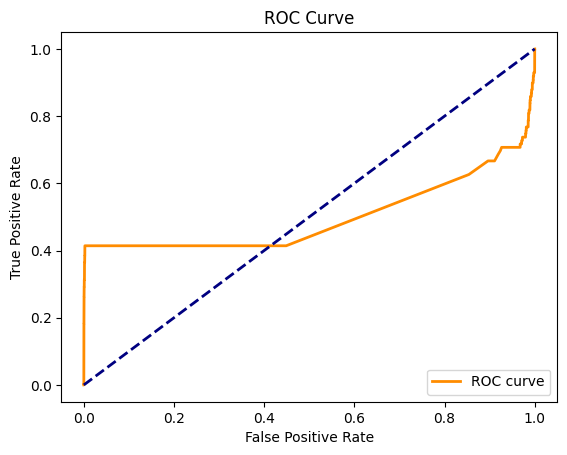

In [ ]:
# Predict probabilities for test set
probs = model.predict_proba(X_test_tensor)

# Get false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(y_test_tensor, probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate AUC score
auc_score = roc_auc_score(y_test_tensor, probs[:, 1])
print('AUC score:', auc_score)

AUC score: 0.4990887279209064


In [ ]:
test_outputs = model.predict(X_test_tensor)

In [ ]:
predicted_labels = (test_outputs >= 0.6)
predicted_labels=np.squeeze(predicted_labels)


In [ ]:
predicted_labelsList=[]
for i in predicted_labels:
    if i==True:
        predicted_labelsList.append(1)
    else:
        predicted_labelsList.append(0)

In [ ]:
predicted_labelsList

In [ ]:
predicted=torch.Tensor(predicted_labelsList)

In [ ]:
accuracy = torch.sum(predicted == y_test_tensor).item() / y_test_tensor.size(0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9987


In [ ]:
print(classification_report(y_test_tensor, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76921
           1       0.43      0.09      0.15        99

    accuracy                           1.00     77020
   macro avg       0.71      0.55      0.57     77020
weighted avg       1.00      1.00      1.00     77020



In [ ]:
tp = torch.sum((y_test_tensor == 1) & (predicted== 1)).item()
fp = torch.sum((y_test_tensor == 0) & (predicted == 1)).item()
fn = torch.sum((y_test_tensor == 1) & (predicted == 0)).item()

In [ ]:
print('tp:',tp)
print('fp:',fp)
print('fn:',fn)
# Calculate Precision For Class: Anomal
precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0.0
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'False Negative: {fn}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

tp: 9
fp: 12
fn: 90
True Positives: 9
False Positives: 12
False Negative: 90
Precision: 0.4286
Recall: 0.0909


In [ ]:
tp = torch.sum((y_test_tensor ==0) & (predicted== 0)).item()
fp = torch.sum((y_test_tensor == 1) & (predicted == 0)).item()
fn = torch.sum((y_test_tensor == 0) & (predicted == 1)).item()

In [ ]:
print('tp:',tp)
print('fp:',fp)
print('fn:',fn)
# Calculate Precision For Class: normal
precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0.0
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

tp: 76909
fp: 90
fn: 12
True Positives: 76909
False Positives: 90
Precision: 0.9988
Recall: 0.9998


# For Unbalance Class

In [ ]:
import joblib
import time

In [ ]:
scaler = StandardScaler()
X_train_tensor = scaler.fit_transform(X_train_tensor)
X_test_tensor = scaler.transform(X_test_tensor)

# Initialize and train the SVM model with class weights
svm_model = SVC(kernel='linear', class_weight='balanced')  # 'balanced' automatically adjusts class weights

start_time = time.time()
svm_model.fit(X_train_tensor, y_train_tensor)
training_time = time.time() - start_time

print(f"Training time: {training_time:.2f} seconds")

model_filename = BasePath +'svm_model.joblib'
joblib.dump(svm_model, model_filename)
print(f"SVM model saved to {model_filename}")


Training time: 3810.76 seconds
SVM model saved to drive/MyDrive/Term_05/FinalProject/Dataset/svm_model.joblib


In [ ]:
# Load the SVM model from the saved file
loaded_model = joblib.load(model_filename)

In [ ]:
test_outputs = svm_model.predict(X_test_tensor)

In [ ]:
predicted_labels = (test_outputs >= 0.9)
predicted_labels=np.squeeze(predicted_labels)
predicted_labelsList=[]
for i in predicted_labels:
    if i==True:
        predicted_labelsList.append(1)
    else:
        predicted_labelsList.append(0)
predicted=torch.Tensor(predicted_labelsList)
accuracy = torch.sum(predicted == y_test_tensor).item() / y_test_tensor.size(0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9797


In [ ]:
print(classification_report(y_test_tensor, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     76921
           1       0.04      0.69      0.08        99

    accuracy                           0.98     77020
   macro avg       0.52      0.83      0.53     77020
weighted avg       1.00      0.98      0.99     77020



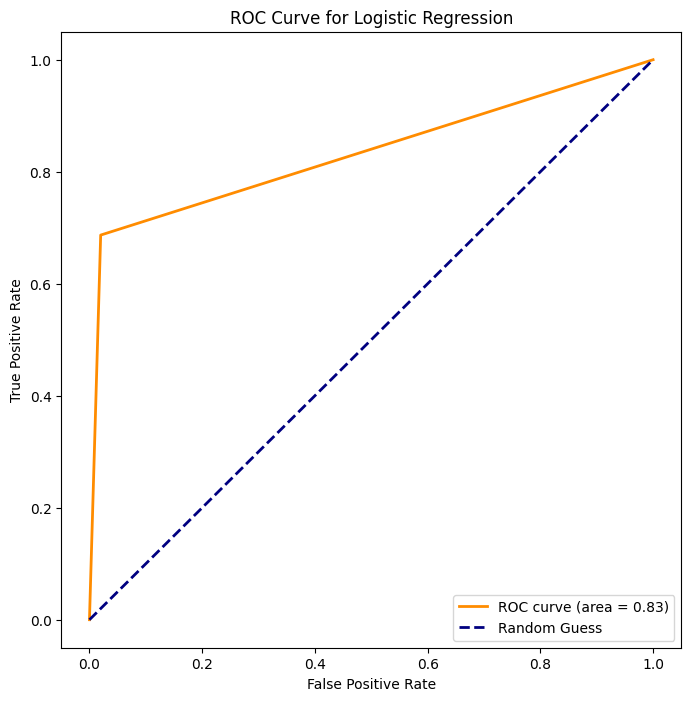

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_tensor, predicted)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()